<img src="house.jpg"/>

In [1]:
from pycaret.regression import setup, compare_models
from pycaret.regression import *

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split ,cross_val_score 

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings
sns.set_palette("pastel")

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
test_df = pd.read_csv(r"C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Supervised ML_Regression\boston-house-price-prediction-regression\house-prices-advanced-regression-techniques\test.csv")
train_df = pd.read_csv(r"C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Supervised ML_Regression\boston-house-price-prediction-regression\house-prices-advanced-regression-techniques\train.csv")
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df=pd.concat([train_df.drop('SalePrice',axis=1),test_df])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2918.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean    472.874572    93.709832    47.486811      23.098321     2.602261   
std     215.394815   126.526589    67.575493      64.244246    25.188169   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     320.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    26.000000       0.000000     0.000000   
75%     576.000000   168.000000    70.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000  
mean     16.062350     2.251799     50.825968     6.213087  2007.792737  
std      56.184365    35.663946    567.402211     2.714762     1.314964  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

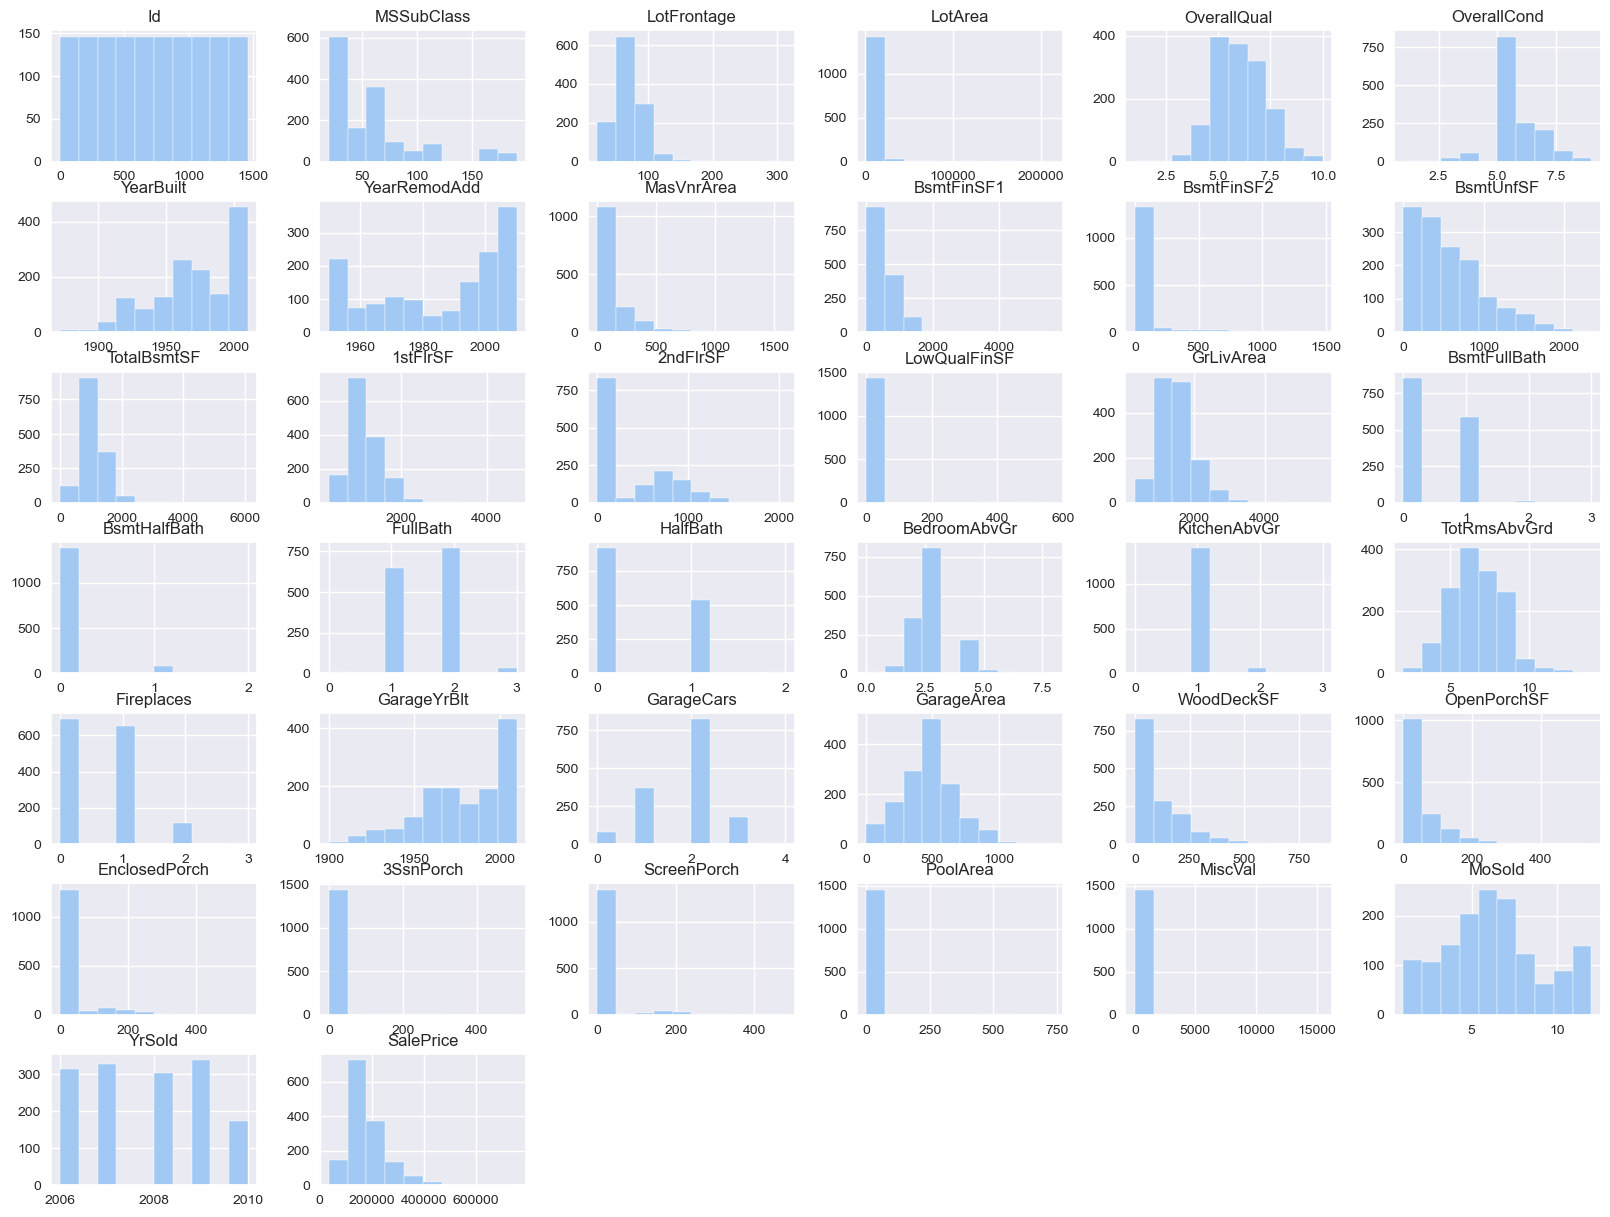

In [6]:
train_df.hist(figsize=(20,15))
plt.show()

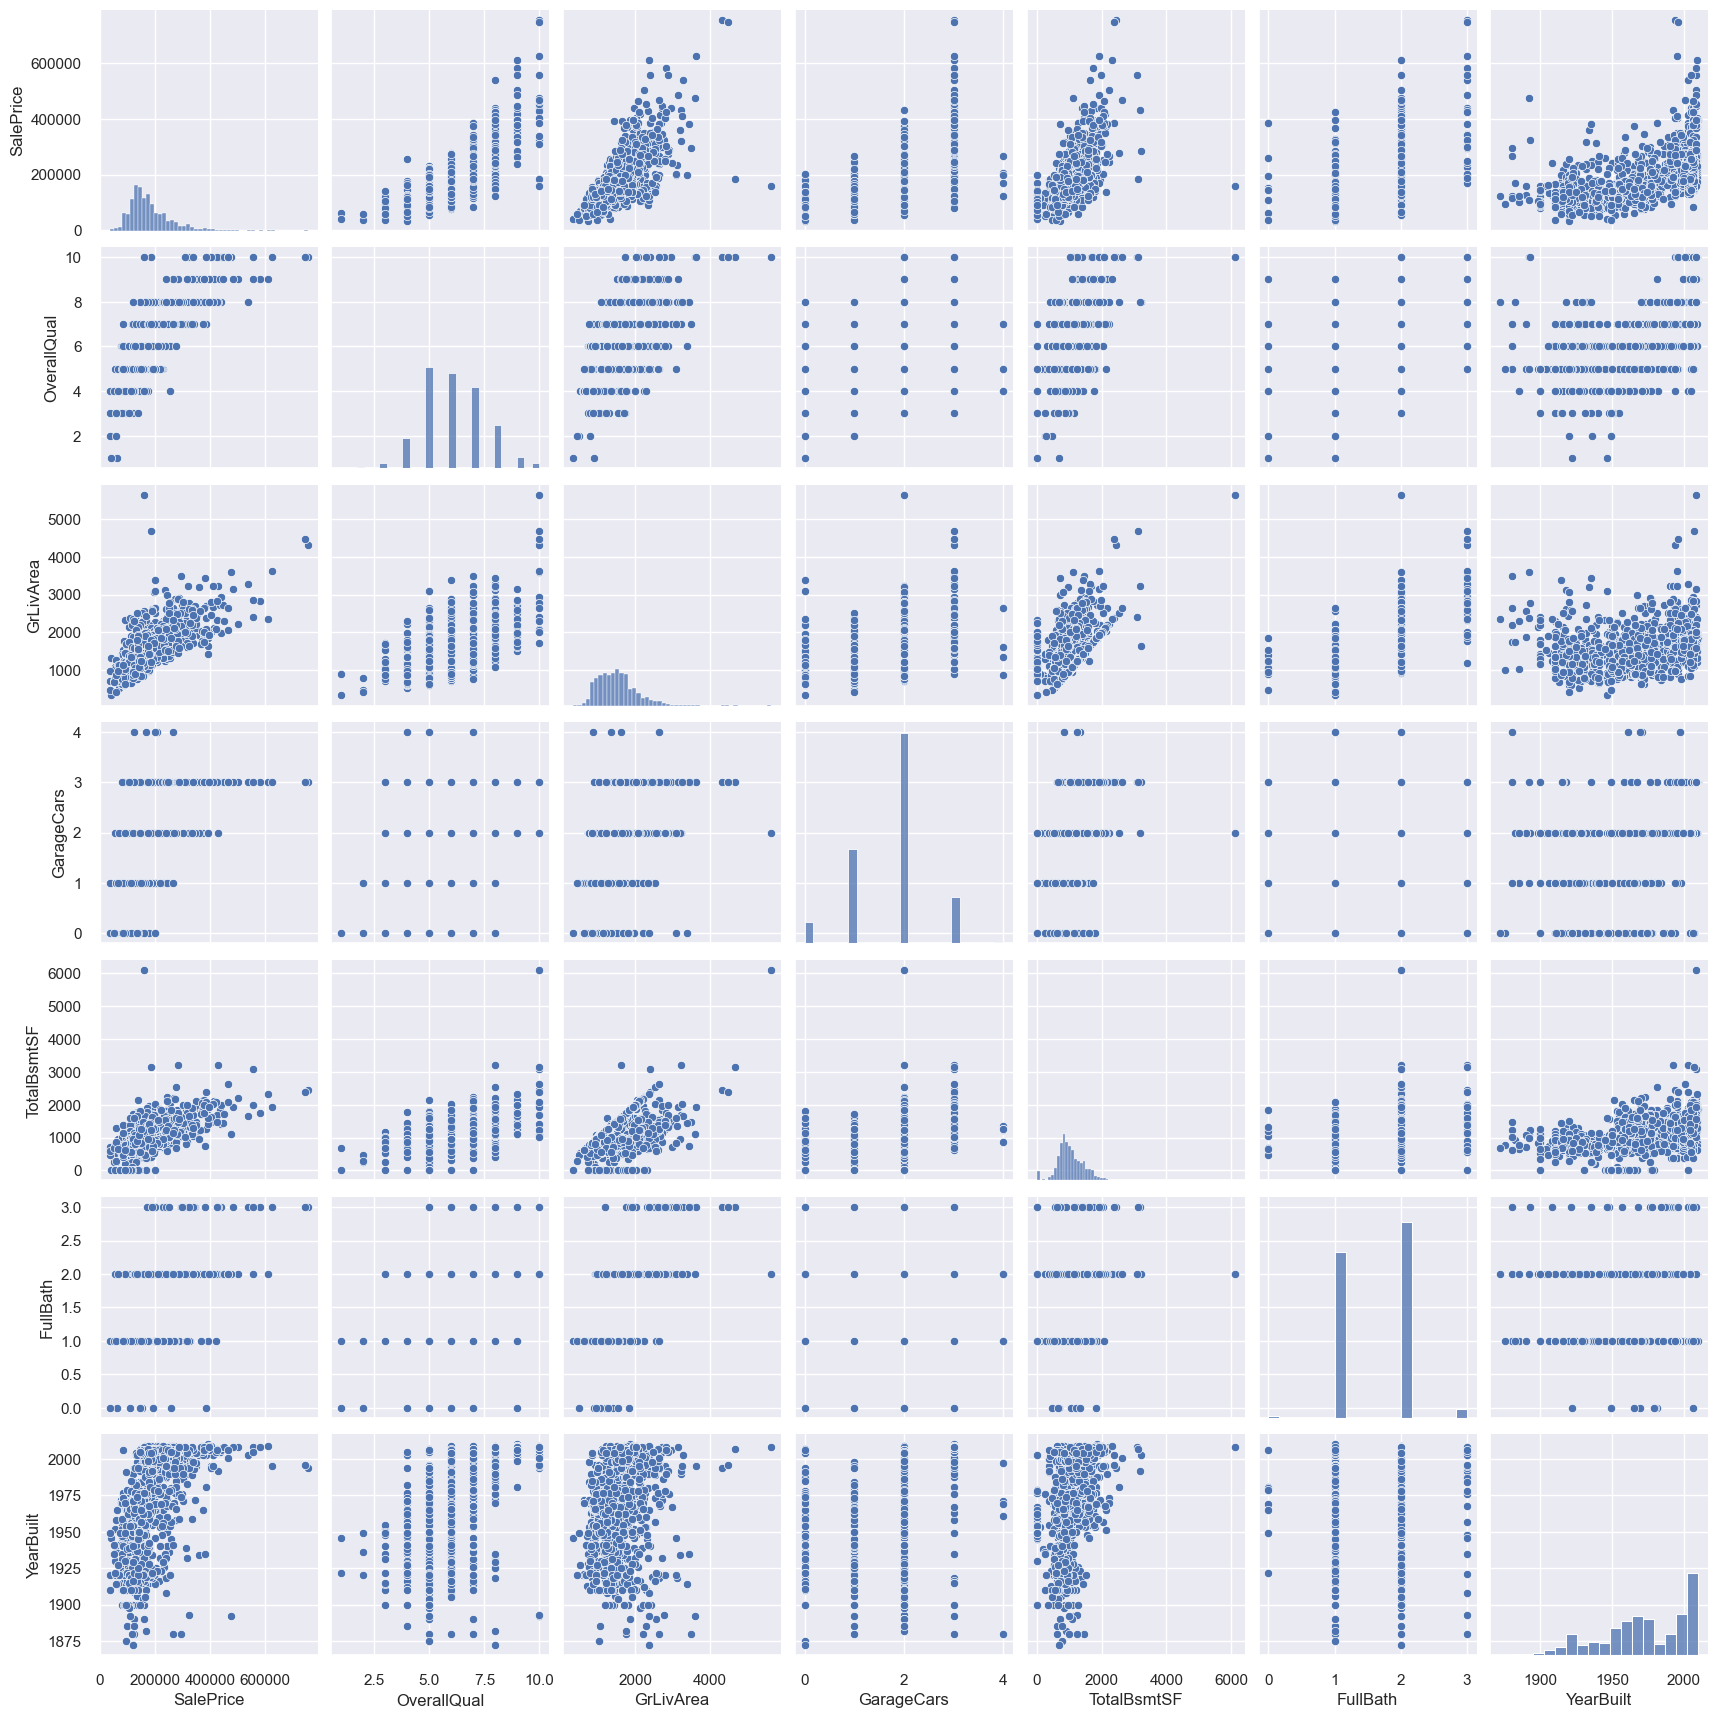

In [7]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train_df[cols],size=2.5)
plt.show()

# Time Serise

In [8]:
## get all columns with Year to find the relathon between them and price
import pandas as pd

# Assuming df is your dataframe
numerical_cols_names = df.select_dtypes(include='number').columns

Years = []
for i in numerical_cols_names:
    if 'Year' in i or 'Yr' in i:
        Years.append(i)

print(Years)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


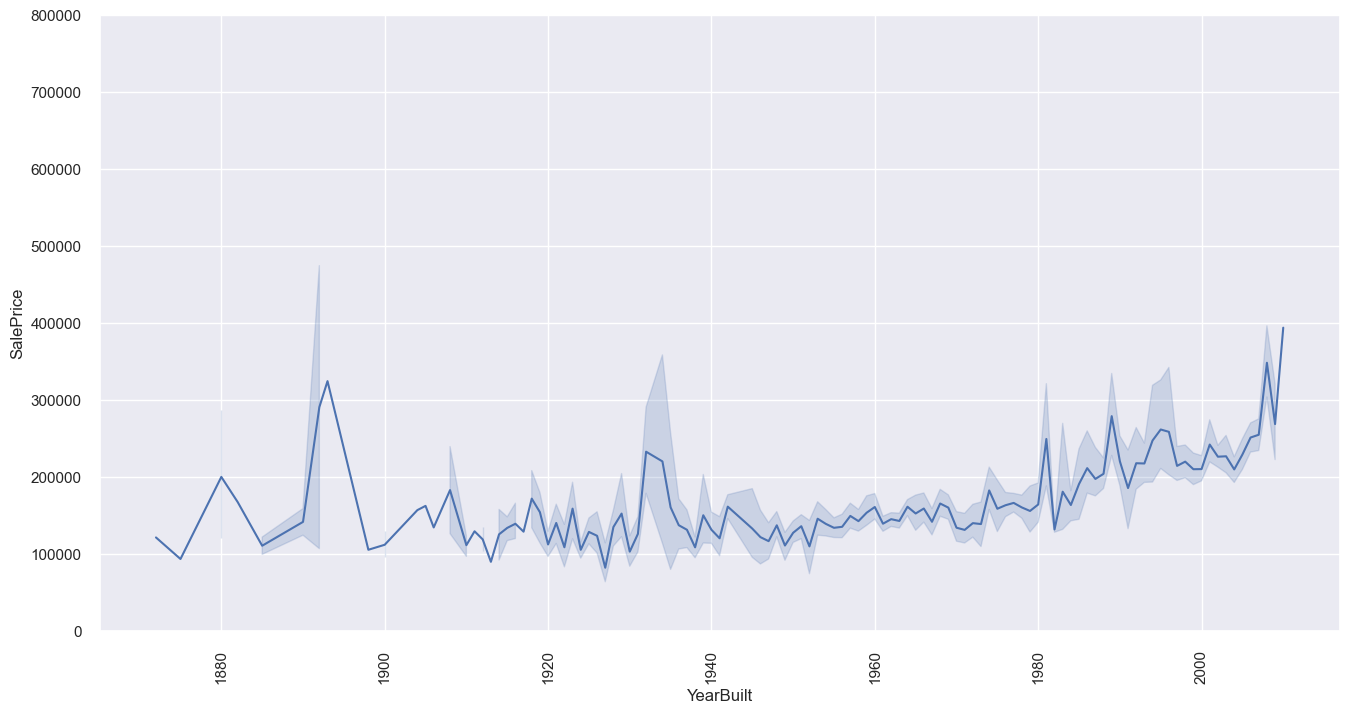

In [9]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.lineplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

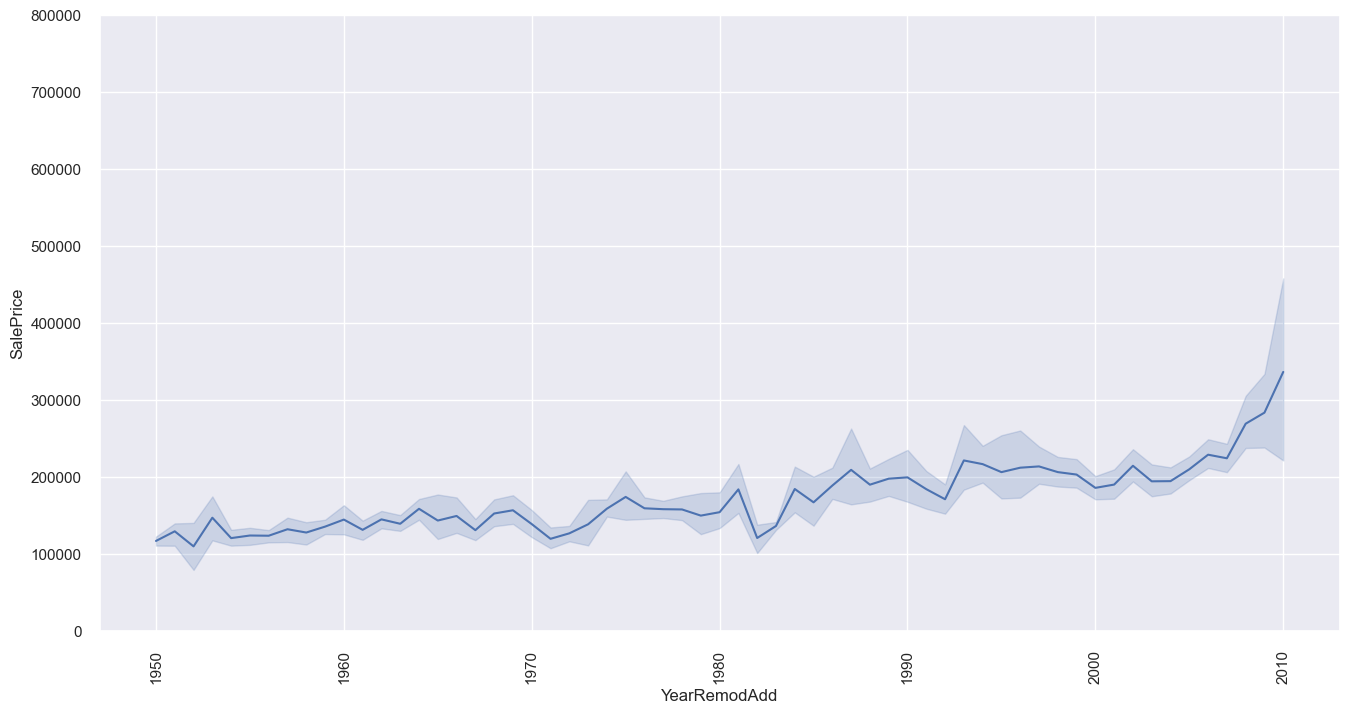

In [10]:
var = 'YearRemodAdd'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.lineplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

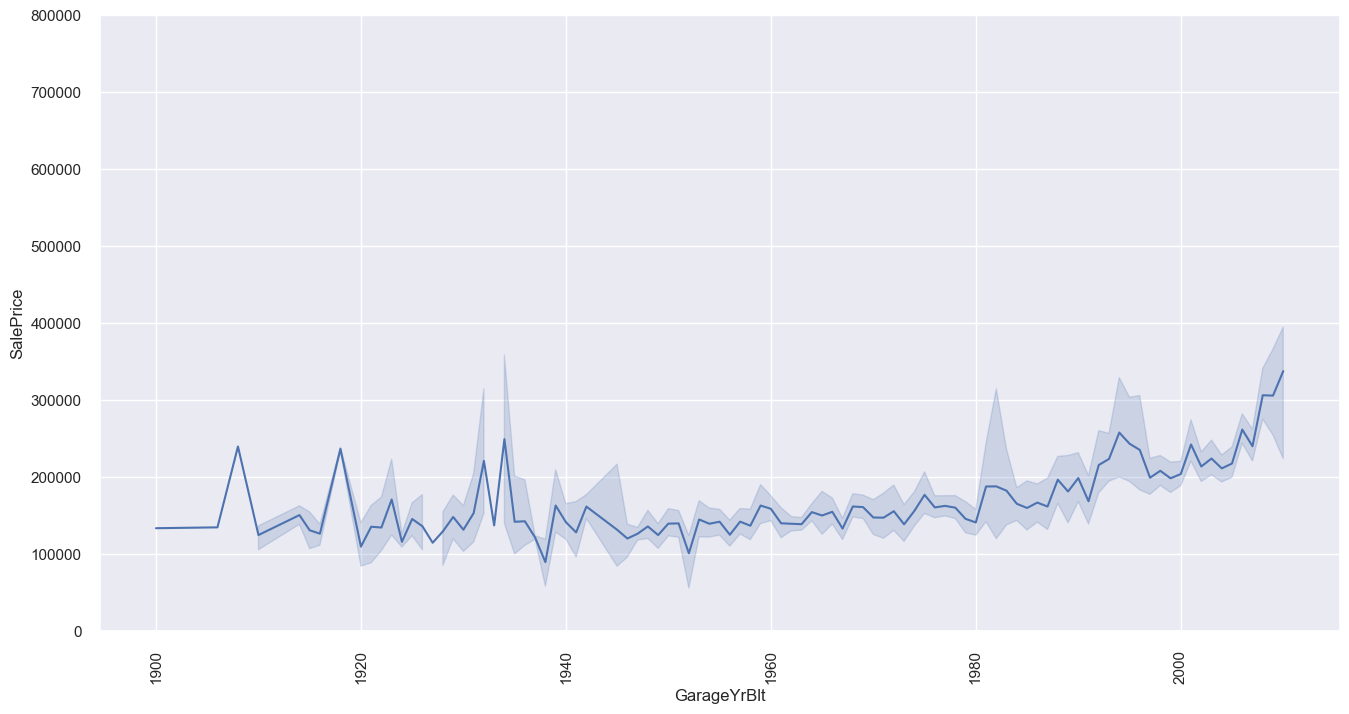

In [11]:
var = 'GarageYrBlt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.lineplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

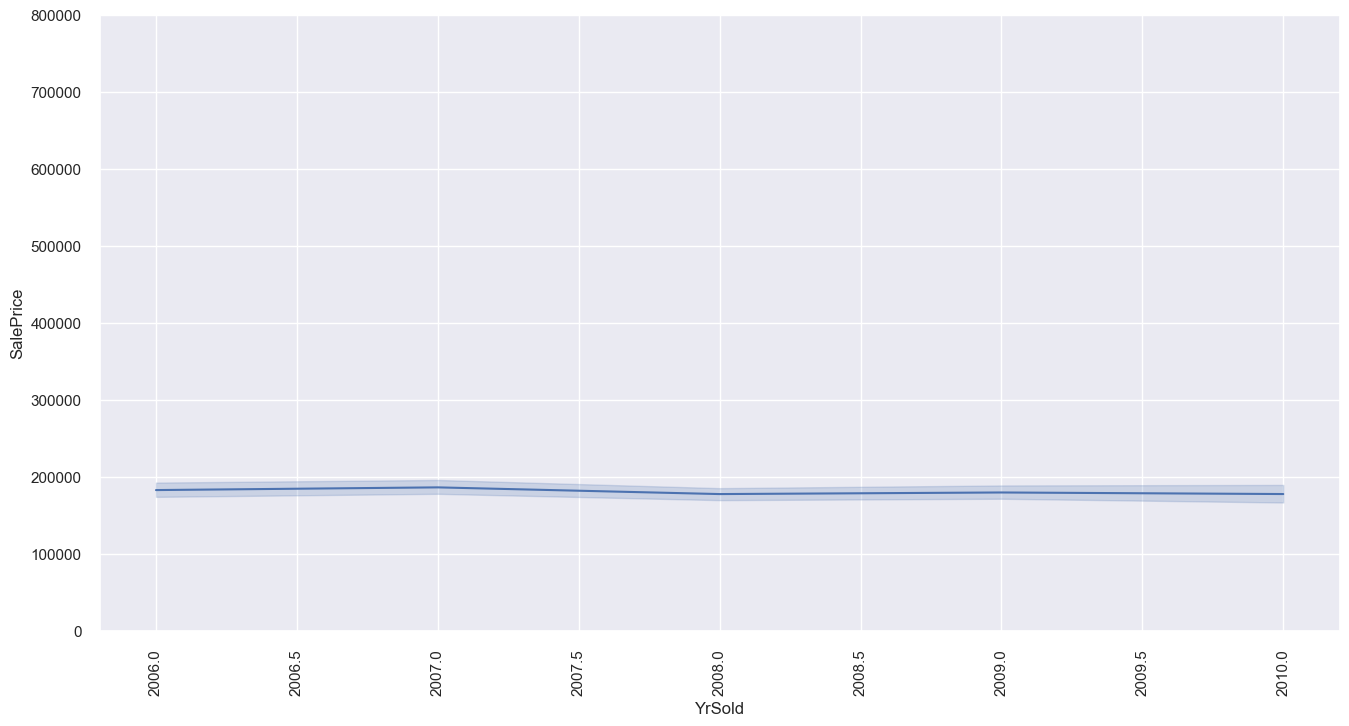

In [12]:
var = 'YrSold'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.lineplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

After anaylizing the features types and null counts, we decided to remove 4 features because they contain too many nulls (Alley, PoolQC, Fence, MiscFeature).¶
For the rest of the features containing nulls we first added a random value for features of type Object, and added the average for features of Int/Float type.
But after analyzing the features deeper we noticed the null values in most of the categorial features have meaning, so we decided to change these values to a new string matching the same meaning of the null, for example if a null meant the house has no garage, we changed all nulls to "No Garage"¶

In [13]:
df.drop(['Id'],axis=1,inplace=True)

In [14]:
df.isna().sum().sort_values(ascending=False).head(12)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
dtype: int64

In [15]:
#2. filling missing data¶
#for categorical in which na have meaning :

df.select_dtypes(include=['object']).isna().sum().sort_values(ascending=False).head(60)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Exterior1st         1
SaleType            1
KitchenQual         1
Electrical          1
RoofStyle           0
HouseStyle          0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Foundation          0
Street              0
RoofMatl            0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SaleCondition       0
dtype: int64

In [16]:
cat_f_1=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
   ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for column in cat_f_1:
    df[column] = df[column].fillna("None")
    

In [17]:
#FOR OTHER CATEGORICAL FEATURES WHERE NAN MEANS MISSING VALUE WE WILL REPLACE NANS WITH MOST FREQUENT VALUE

cat_f_2=['MasVnrType','MSZoning','Functional','Utilities','SaleType','Exterior2nd','Exterior1st',
         'Electrical' ,'KitchenQual']
for column in cat_f_2:
    df[column] = df[column].fillna(df[column].mode()[0])

In [18]:
#now lets check with what left over

df.isna().sum().sort_values(ascending=False).head(12)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
BsmtFinSF1        1
GarageArea        1
TotRmsAbvGrd      0
dtype: int64

In [19]:
#### NUMERICAL FEATURES
#now it would be easy for me to remove the nulls but its more than 5% so i decided to train a knn to impute the data with it

def impute_knn(data):
    numerical_cols_names=data.select_dtypes(exclude='O').columns
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = data.copy()
    df_imputed [numerical_cols_names] = imputer.fit_transform(df_imputed[numerical_cols_names])
    return df_imputed

In [20]:
df_imputed=impute_knn(df)

df_imputed.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1        20.0       RL         80.0   9600.0   Pave  None      Reg   
2        60.0       RL         68.0  11250.0   Pave  None      IR1   
3        70.0       RL         60.0   9550.0   Pave  None      IR1   
4        60.0       RL         84.0  14260.0   Pave  None      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...         0.0      0.0   None  None   
1         Lvl    AllPub       FR2  ...         0.0      0.0   None  None   
2         Lvl    AllPub    Inside  ...         0.0      0.0   None  None   
3         Lvl    AllPub    Corner  ...         0.0      0.0   None  None   
4         Lvl    AllPub       FR2  ...         0.0      0.0   None  None   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        None     0.0     2.0  2008.0        WD         Normal  
1        None     0.0     5.0  2007.0        WD         Normal  
2        None     0.0     9.0  2008.0        WD         Normal  
3        None     0.0     2.0  2006.0        WD        Abnorml  
4        None     0.0    12.0  2008.0        WD         Normal  

[5 rows x 79 columns]

# Feature engineering

In [21]:
def adding_area(data):
    data['TotalArea']=data['LotFrontage']+data['LotArea']

    data['Total_Home_Quality'] = data['OverallQual'] + data['OverallCond']

    data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
    data["AllSF"] = data["GrLivArea"] + data["TotalBsmtSF"]

    data["AvgSqFtPerRoom"] = data["GrLivArea"] / (data["TotRmsAbvGrd"] +
                                                       data["FullBath"] +
                                                       data["HalfBath"] +
                                                       data["KitchenAbvGr"])

    data["totalFlrSF"] = data["1stFlrSF"] + data["2ndFlrSF"]
    return data 

In [22]:
def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

### This piece of code creates new categorical features from existing numerical features, which may improve their processing by machine learning models.

In [23]:
df1=adding_area(df_imputed)
df1['GarageArea_cat'] = df1['GarageArea'].apply(Gar_category).astype('str')
df1['GrLivArea_cat'] = df1['GrLivArea'].apply(Low_category).astype('str')
df1['1stFlrSF_cat'] = df1['1stFlrSF'].apply(fl1_category).astype('str')
df1['2ndFlrSF_cat'] = df1['2ndFlrSF'].apply(fl1_category).astype('str')
df1['TotalBsmtSF_cat'] = df1['TotalBsmtSF'].apply(bsmtt_category).astype('str')
df1['BsmtUnfSF_cat'] = df1['BsmtUnfSF'].apply(bsmt_category).astype('str')
df1['LotFrontage_cat'] = df1['LotFrontage'].apply(lot_category).astype('str')
df1['LotArea_cat'] = df1['LotArea'].apply(lot_category1).astype('str')
df1['YearBuilt_cat'] = df1['YearBuilt'].apply(year_category).astype('str').astype('str').astype('str')
df1['YearRemodAdd_cat'] = df1['YearRemodAdd'].apply(year_category).astype('str').astype('str')
df1['GarageYrBlt_cat'] = df1['GarageYrBlt'].apply(year_category).astype('str')
df1['MasVnrArea_cat'] = df1['MasVnrArea'].apply(vnr_category).astype('str')
df1['AllSF_cat'] = df1['AllSF'].apply(allsf_category).astype('str')

### This piece of code calculates the absolute deviation of numerical features in a data frame and displays it as a bar chart to help you evaluate the distribution of your data.

* Absolute skewness values closer to 0 indicate a more symmetrical distribution, while higher values indicate stronger skewness in any direction.
* This visualization can be useful in determining whether data transformation techniques (such as log transformation) are necessary before using certain machine learning algorithms that are affected by skewed data.

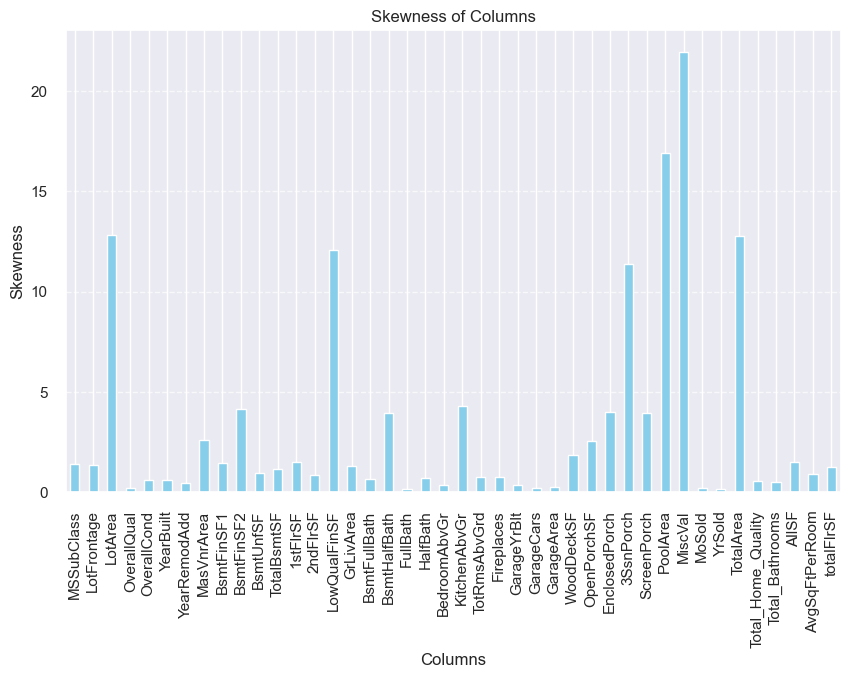

In [24]:
skewness = df1.select_dtypes(exclude='O').skew().abs()

# Plot skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Overall goal:

* This code compares the original distributions of numerical features with their log- and square-root-transformed versions. This can help visualize the impact of different transformations and guide feature engineering decisions to make the data more suitable for machine learning models.

### Key points:

* Data transformations can address issues such as skew or outliers that may affect model performance.
* Evaluating distributions before and after transfers is critical to selecting appropriate transfers.
* Understanding the effects of transformations is essential for building effective machine learning models.

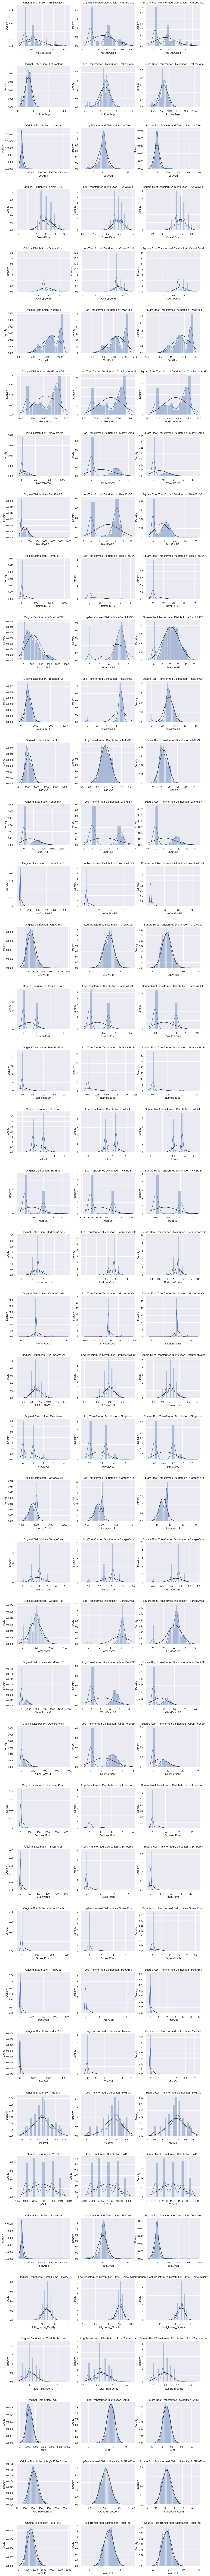

In [25]:
import scipy.stats

numerical_features = df1.select_dtypes(include=np.number).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=3, figsize=(15, 5 * len(numerical_features)))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    # Original Distribution
    sns.distplot(df1[feature], kde=True, ax=axes[i, 0],fit=scipy.stats.norm)
    axes[i, 0].set_title(f'Original Distribution - {feature}')

    # Log-Transformed Distribution
    log_transformed = np.log1p(df1[feature])  # Adding 1 to avoid log(0)
    sns.distplot(log_transformed, kde=True, ax=axes[i, 1],fit=scipy.stats.norm)
    axes[i, 1].set_title(f'Log-Transformed Distribution - {feature}')

    # Square Root Transformed Distribution
    sqrt_transformed = np.sqrt(df1[feature])
    sns.distplot(sqrt_transformed, kde=True, ax=axes[i, 2],fit=scipy.stats.norm)
    axes[i, 2].set_title(f'Square Root Transformed Distribution - {feature}')

plt.show()


In [26]:
to_log1p=['LotArea','MasVnrArea','BsmtFinSF2','1stFlrSF','LowQualFinSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd'
         ,'GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
         ,'TotalArea','AllSF','AvgSqFtPerRoom','totalFlrSF']
to_sqrt=['LotFrontage','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtHalfBath','Total_Bathrooms',]
for col in to_log1p:
    df1[col]=np.log1p (df1[col])
for col in to_sqrt:
    df1[col]=np.sqrt (df1[col])

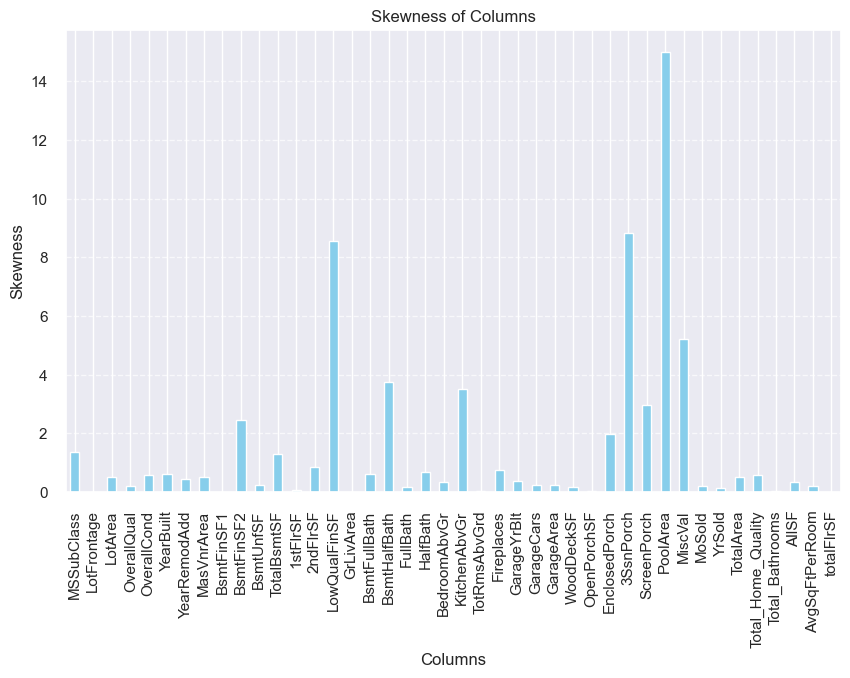

In [27]:
skewness = df1.select_dtypes(exclude='O').skew().abs()

# Plot skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

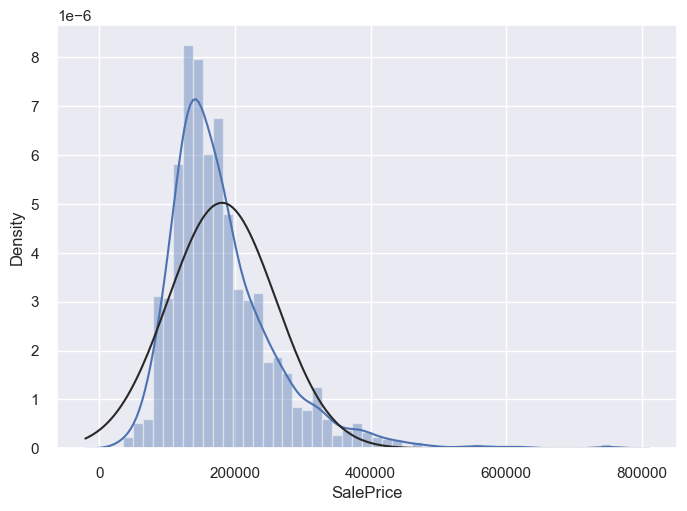

In [28]:
sns.distplot(train_df['SalePrice'], fit=scipy.stats.norm);

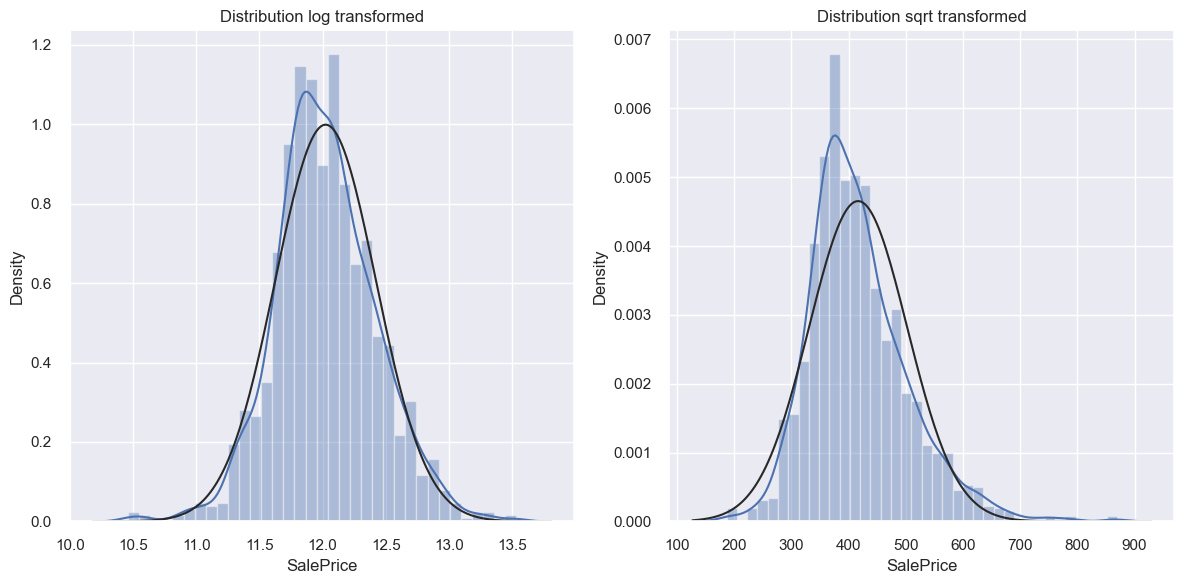

In [29]:
target_log = np.log1p(train_df['SalePrice'])
target_sqrt= np.sqrt(train_df['SalePrice'])
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot the first distribution
sns.distplot(target_log, kde=True, ax=axes[0],fit=scipy.stats.norm)
axes[0].set_title('Distribution log transformed')

# Plot the second distribution
sns.distplot(target_sqrt, kde=True, ax=axes[1],fit=scipy.stats.norm)
axes[1].set_title('Distribution sqrt transformed')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

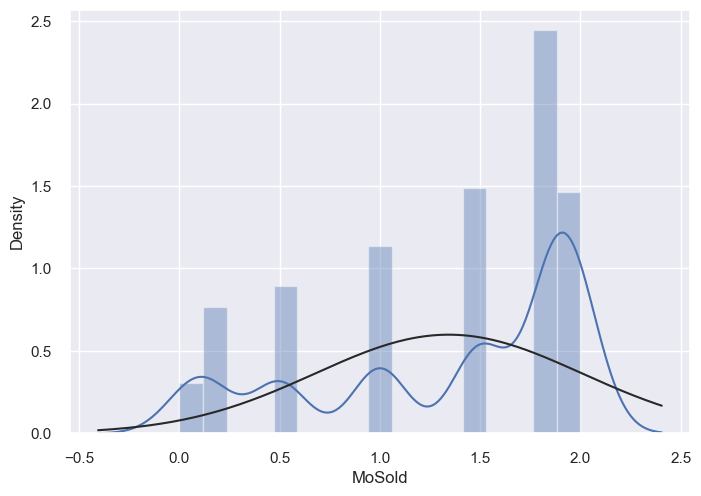

In [30]:
df1['MoSold'] = (-np.cos(0.5236 * df1['MoSold'])+1)
sns.distplot(df1['MoSold'], fit=scipy.stats.norm);

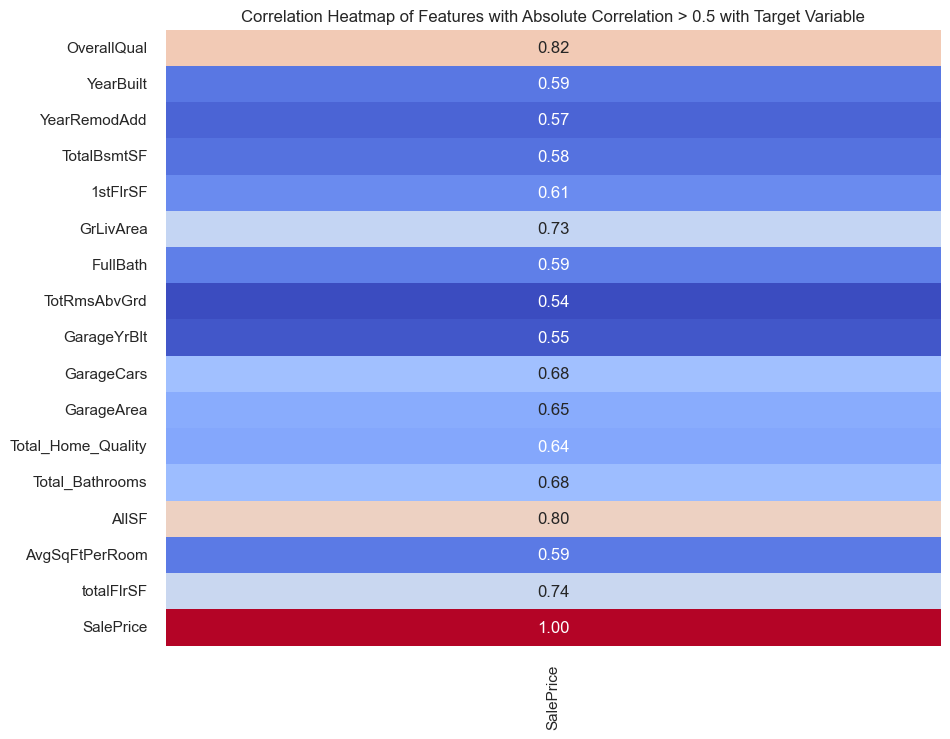

In [31]:
numrical_var = df1.iloc[:1460].select_dtypes(exclude='O')
numrical_var_with_target=numrical_var.copy()
numrical_var_with_target['SalePrice']=target_log
corr_mat=numrical_var_with_target.corr()
feature_subset=corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
correlation_matrix_subset = corr_mat.loc[feature_subset, ['SalePrice']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap of Features with Absolute Correlation > 0.5 with Target Variable')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# scaling and encoding

In [32]:
encoded_df=df1.copy()
encoded_df=pd.get_dummies(encoded_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 366 entries, MSSubClass to AllSF_cat_7
dtypes: bool(324), float64(42)
memory usage: 1.9 MB


###  RobustScaler is a particularly good choice for datasets that may contain outliers, as it uses the median and interquartile range (IQR) to scale the data, making it less sensitive to extreme values.

In [33]:
robust_scaler = RobustScaler()
scaled_df=pd.DataFrame(robust_scaler.fit_transform(encoded_df), index=encoded_df.index, columns=encoded_df.columns)
scaled_df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0         0.2    -0.253977 -0.256995          0.5          0.0   0.631579   
1        -0.6     0.482074  0.035356          0.0          3.0   0.063158   
2         0.2    -0.100466  0.398758          0.5          0.0   0.589474   
3         0.4    -0.517926  0.023391          0.5          0.0  -1.221053   
4         0.2     0.666400  0.941998          1.0          0.0   0.568421   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageYrBlt_cat_3  \
0      0.256410    1.033493    0.272857         0.0  ...                0.0   
1     -0.435897    0.000000    0.446542         0.0  ...                1.0   
2      0.230769    0.996432    0.105713         0.0  ...                0.0   
3     -0.589744    0.000000   -0.165709         0.0  ...                0.0   
4      0.179487    1.146479    0.236746         0.0  ...                0.0   

   GarageYrBlt_cat_4  GarageYrBlt_cat_5  MasVnrArea_cat_1  MasVnrArea_cat_2  \
0                0.0                1.0               0.0               0.0   
1                0.0                0.0               0.0               0.0   
2                0.0                1.0               0.0               0.0   
3                1.0                0.0               0.0               0.0   
4                0.0                1.0              -1.0               1.0   

   MasVnrArea_cat_3  MasVnrArea_cat_4  AllSF_cat_1  AllSF_cat_2  AllSF_cat_7  
0               0.0               0.0          0.0          0.0          0.0  
1               0.0               0.0          0.0          0.0          0.0  
2               0.0               0.0          0.0          0.0          0.0  
3               0.0               0.0          0.0          0.0          0.0  
4               0.0               0.0          0.0          0.0          0.0  

[5 rows x 366 columns]

# Creat The Machine 

In [34]:
X_train=scaled_df[:1460].copy()
y_train=target_log.copy()
X_test=scaled_df.iloc[1460:]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Previous code...
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape

((1168, 366), (1168,), (292, 366))

In [35]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Create pipelines with StandardScaler for Linear Regression, Ridge Regression, and SVR
linear_regression_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

ridge_regression_pipeline = make_pipeline(
    StandardScaler(),
    Ridge()
)

svr_pipeline = make_pipeline(
    StandardScaler(),
    SVR()
)

# Fit the pipelines on the training data
linear_regression_pipeline.fit(X_train, y_train)
ridge_regression_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear_regression = linear_regression_pipeline.predict(X_test)
y_pred_ridge_regression = ridge_regression_pipeline.predict(X_test)
y_pred_svr = svr_pipeline.predict(X_test)

# Evaluate Linear Regression pipeline
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
error_score_LR = metrics.r2_score(y_test, y_pred_linear_regression)
print(f'Mean Squared Error (Linear Regression): {mse_linear_regression:.2f}')
print("R squared(r**2) error (Linear Regression): ", error_score_LR)
print ("\n")
# Evaluate Ridge Regression pipeline
mse_ridge_regression = mean_squared_error(y_test, y_pred_ridge_regression)
error_score_RR = metrics.r2_score(y_test, y_pred_ridge_regression)
print(f'Mean Squared Error (Ridge Regression): {mse_ridge_regression:.2f}')
print("R squared(r**2) error (Ridge Regression): ", error_score_RR)
print("\n")
# Evaluate SVR pipeline
mse_svr = mean_squared_error(y_test, y_pred_svr)
error_score_SVR = metrics.r2_score(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr:.2f}')
print("R squared(r**2) error (SVR): ", error_score_SVR)


Mean Squared Error (Linear Regression): 4996712173762921472.00
R squared(r**2) error (Linear Regression):  -2.6776087579531866e+19


Mean Squared Error (Ridge Regression): 0.02
R squared(r**2) error (Ridge Regression):  0.9080914897360635


Mean Squared Error (SVR): 0.05
R squared(r**2) error (SVR):  0.7443201627027096


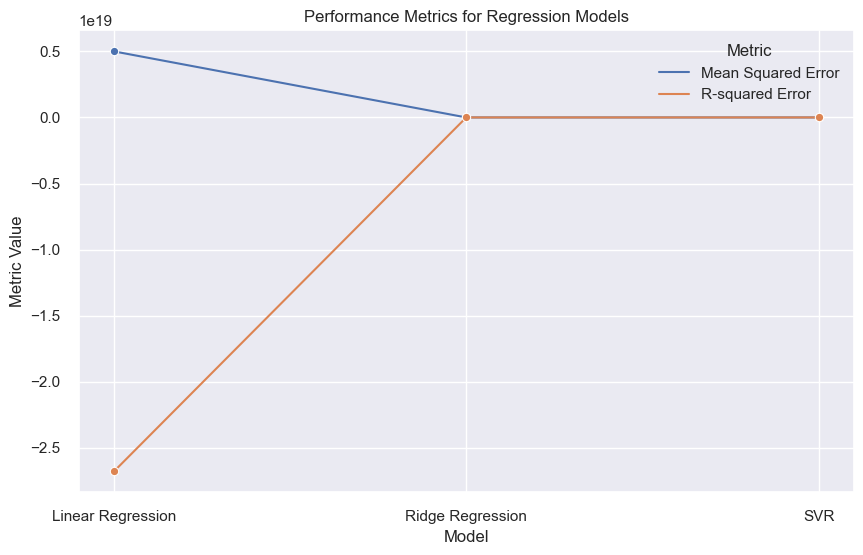

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Results from the Linear Regression, Ridge Regression, and SVR
models = ['Linear Regression', 'Ridge Regression', 'SVR']
mse_values = [mse_linear_regression, mse_ridge_regression, mse_svr]
r2_values = [error_score_LR, error_score_RR, error_score_SVR]

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': models,
    'Mean Squared Error': mse_values,
    'R-squared Error': r2_values
})

# Melt the DataFrame for line plotting
results_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['Mean Squared Error', 'R-squared Error'],
                         var_name='Metric', value_name='Value')

# Plot results using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Value', hue='Metric', data=results_melted, marker='o')
plt.title('Performance Metrics for Regression Models')
plt.ylabel('Metric Value')
plt.show()


Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20


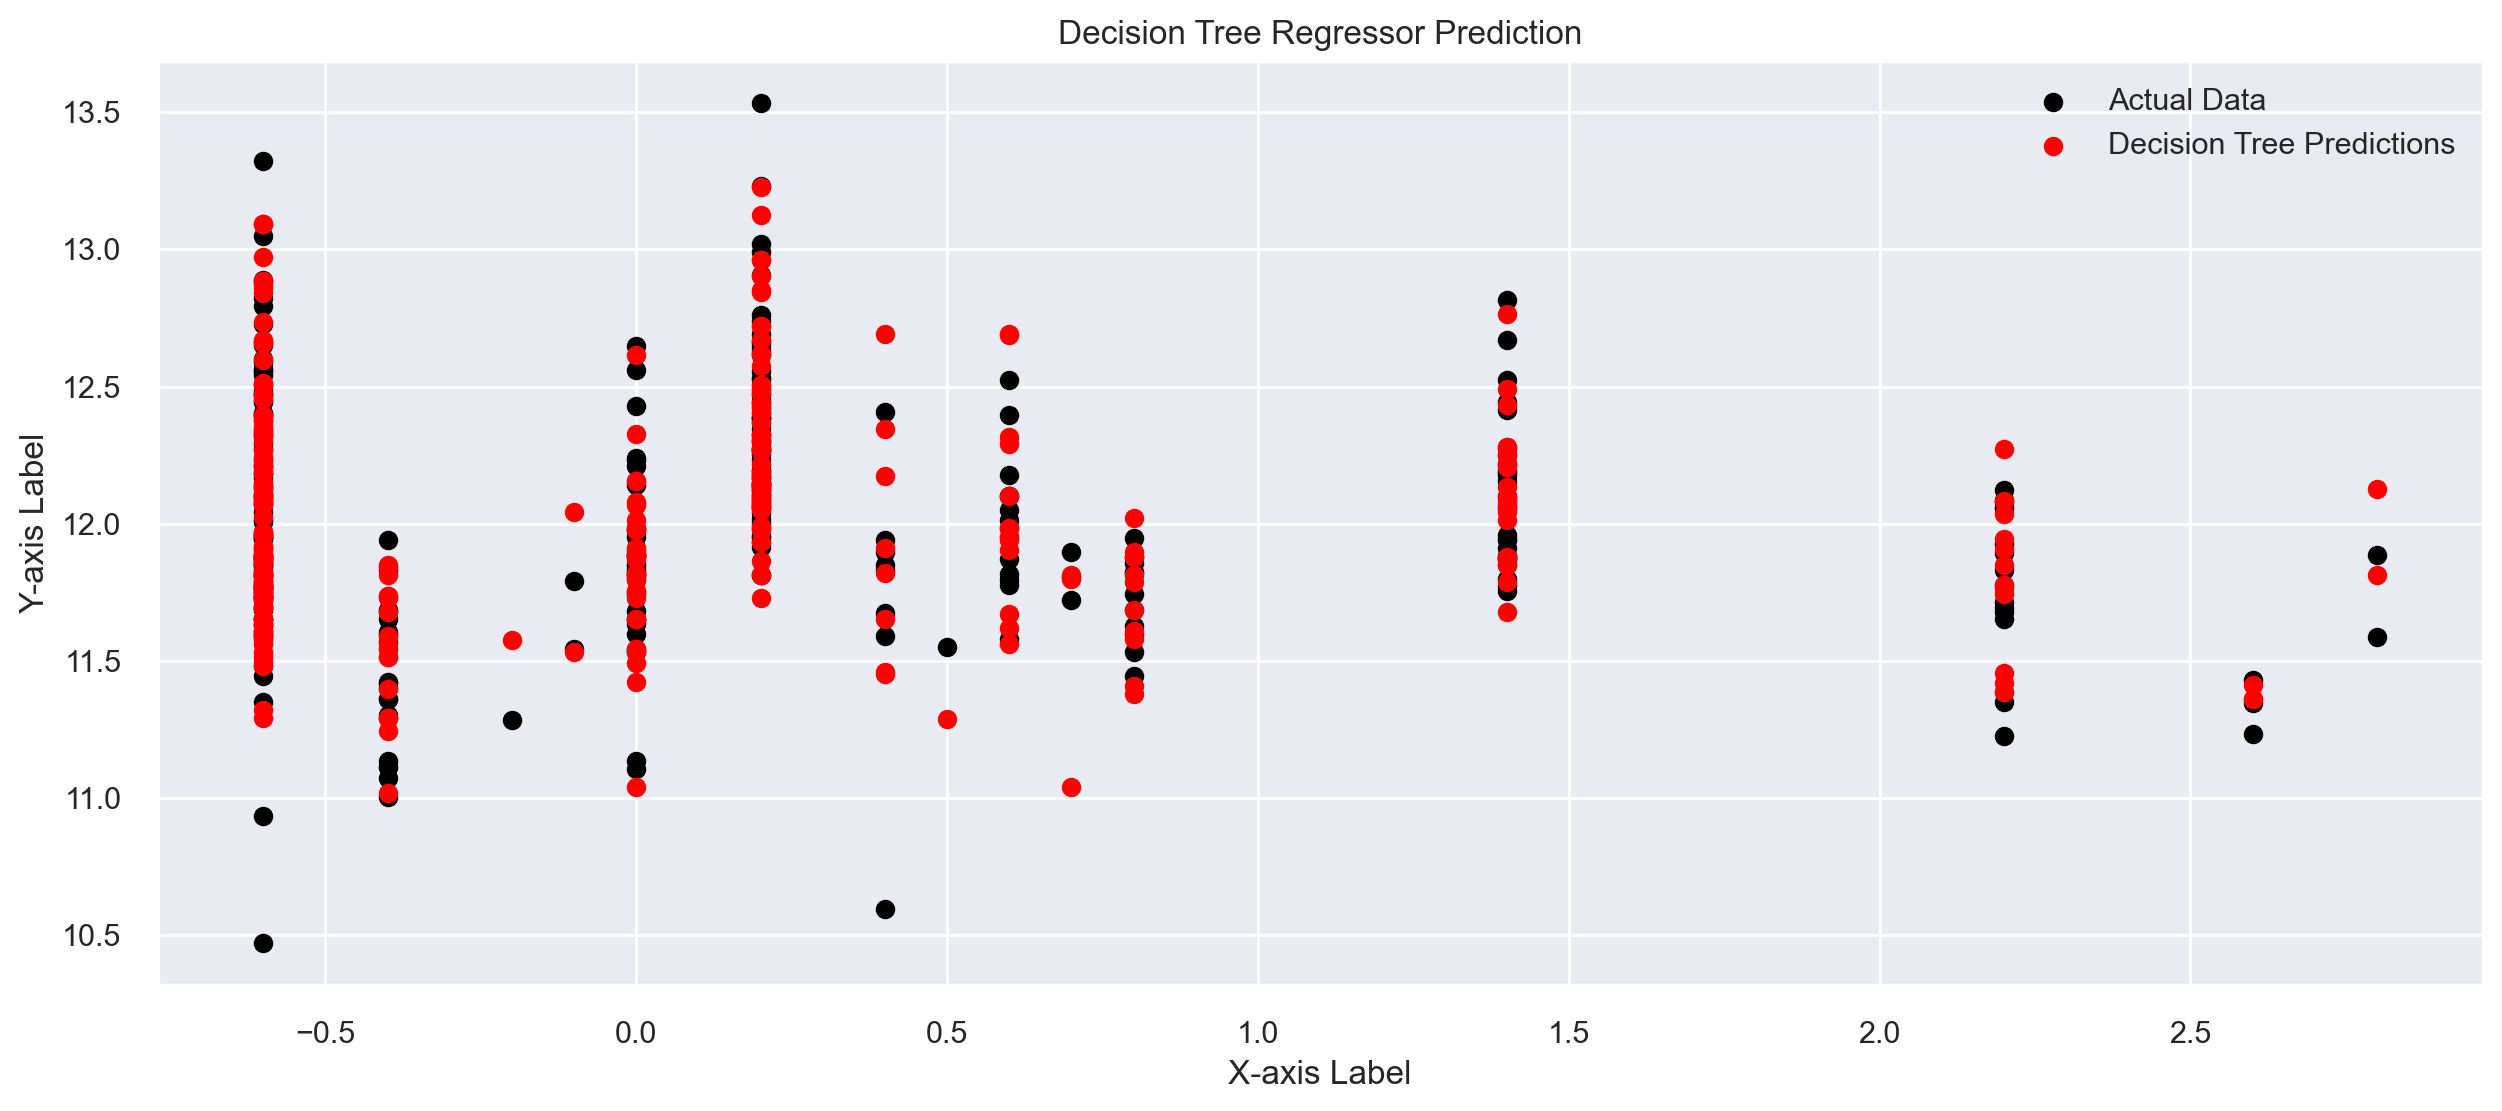

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plot the original data and the Decision Tree predictions
plt.figure(figsize=(15, 6), dpi=200)
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Actual Data')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Decision Tree Predictions')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Decision Tree Regressor Prediction')
plt.legend()
plt.show()


In [38]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Create pipelines with StandardScaler for different regression models


adaboost_pipeline = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

random_forest_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

gradient_boosting_pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

xgboost_pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor()
)

# List of pipelines for iteration
pipelines = [
    adaboost_pipeline,
    random_forest_pipeline,
    gradient_boosting_pipeline,
    xgboost_pipeline
]

# Iterate over each pipeline
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the pipeline
    mse = mean_squared_error(y_test, y_pred)
    error_score = metrics.r2_score(y_test, y_pred)

    # Extract the model name from the pipeline
    model_name = pipeline.steps[-1][0]

    # Print the evaluation results
    print(f'Mean Squared Error ({model_name}): {mse:.2f}')
    print(f'R squared(r**2) error ({model_name}): {error_score:.2f}')
    print('-' * 50)


Mean Squared Error (adaboostregressor): 0.03
R squared(r**2) error (adaboostregressor): 0.84
--------------------------------------------------
Mean Squared Error (randomforestregressor): 0.02
R squared(r**2) error (randomforestregressor): 0.88
--------------------------------------------------
Mean Squared Error (gradientboostingregressor): 0.02
R squared(r**2) error (gradientboostingregressor): 0.90
--------------------------------------------------
Mean Squared Error (xgbregressor): 0.02
R squared(r**2) error (xgbregressor): 0.88
--------------------------------------------------


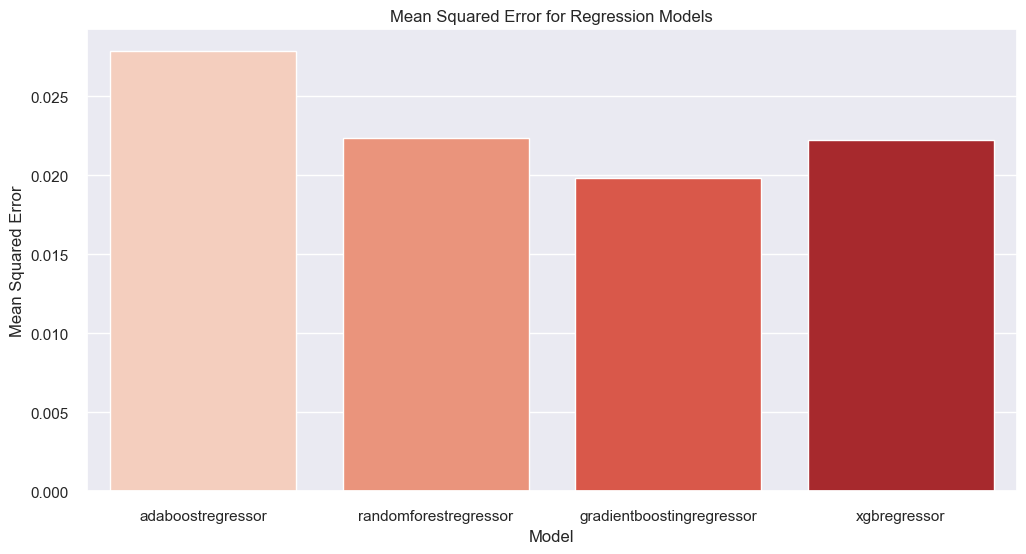

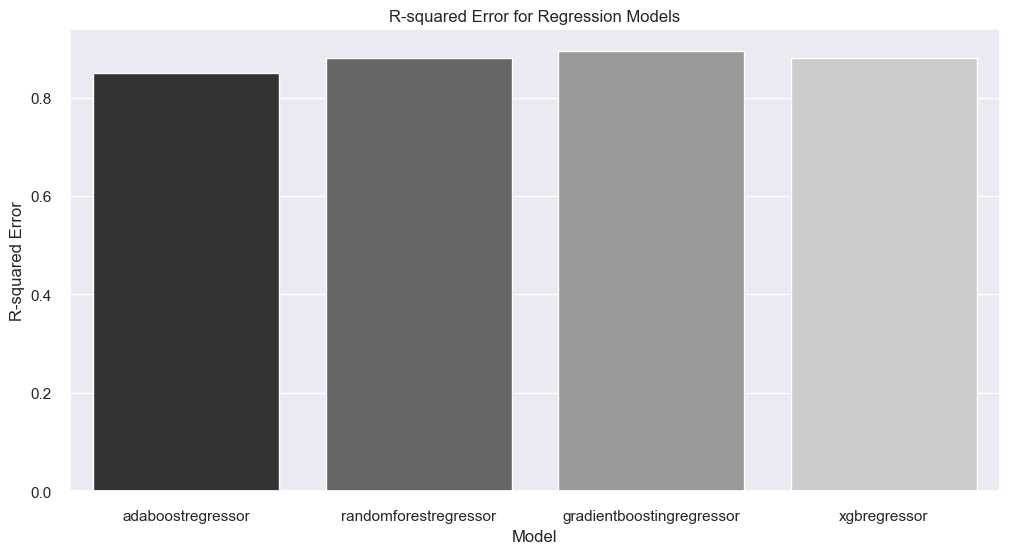

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lists to store results for plotting
model_names = []
mean_squared_errors = []
r_squared_errors = []

# Iterate over each pipeline
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the pipeline
    mse = mean_squared_error(y_test, y_pred)
    error_score = metrics.r2_score(y_test, y_pred)

    # Extract the model name from the pipeline
    model_name = pipeline.steps[-1][0]

    # Append results to lists
    model_names.append(model_name)
    mean_squared_errors.append(mse)
    r_squared_errors.append(error_score)

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mean_squared_errors,
    'R-squared Error': r_squared_errors
})

# Plot results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Mean Squared Error', palette='Reds')
plt.title('Mean Squared Error for Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='R-squared Error', palette='gray')
plt.title('R-squared Error for Regression Models')
plt.ylabel('R-squared Error')
plt.show()


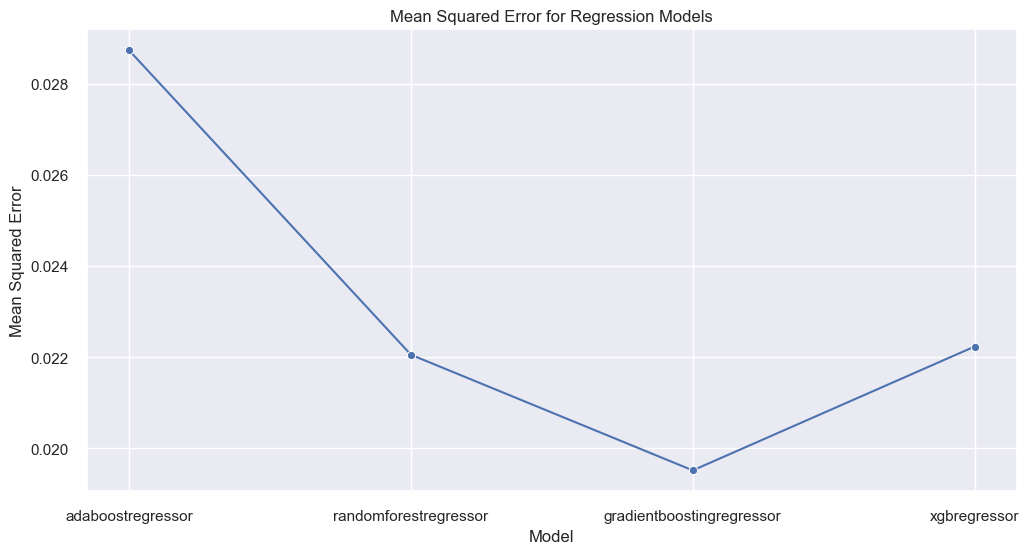

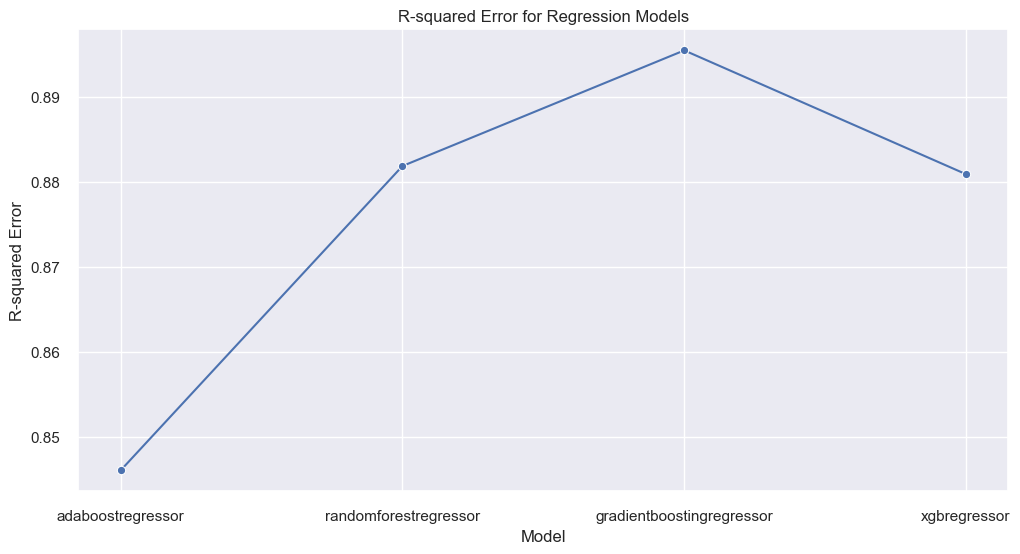

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lists to store results for plotting
model_names = []
mean_squared_errors = []
r_squared_errors = []

# Iterate over each pipeline
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the pipeline
    mse = mean_squared_error(y_test, y_pred)
    error_score = metrics.r2_score(y_test, y_pred)

    # Extract the model name from the pipeline
    model_name = pipeline.steps[-1][0]

    # Append results to lists
    model_names.append(model_name)
    mean_squared_errors.append(mse)
    r_squared_errors.append(error_score)

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mean_squared_errors,
    'R-squared Error': r_squared_errors
})

# Plot results using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='Model', y='Mean Squared Error', marker='o')
plt.title('Mean Squared Error for Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='Model', y='R-squared Error', marker='o')
plt.title('R-squared Error for Regression Models')
plt.ylabel('R-squared Error')
plt.show()


In [41]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train, verbose=100)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


0:	learn: 0.3658263	total: 151ms	remaining: 2m 31s
100:	learn: 0.0837419	total: 884ms	remaining: 7.87s
200:	learn: 0.0597773	total: 1.88s	remaining: 7.49s
300:	learn: 0.0441965	total: 2.71s	remaining: 6.29s
400:	learn: 0.0337443	total: 3.71s	remaining: 5.55s
500:	learn: 0.0268547	total: 4.63s	remaining: 4.62s
600:	learn: 0.0214148	total: 5.63s	remaining: 3.74s
700:	learn: 0.0174118	total: 6.86s	remaining: 2.93s
800:	learn: 0.0144790	total: 7.86s	remaining: 1.95s
900:	learn: 0.0115927	total: 8.73s	remaining: 959ms
999:	learn: 0.0094679	total: 9.56s	remaining: 0us
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


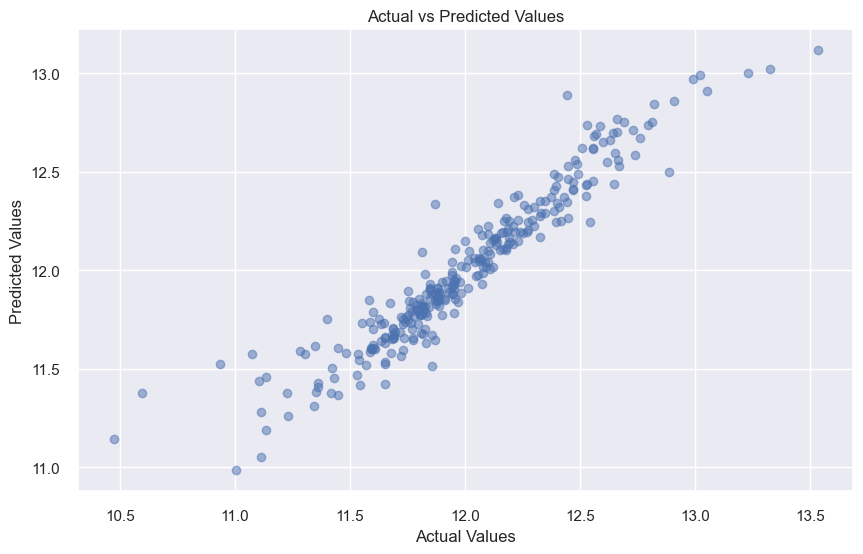

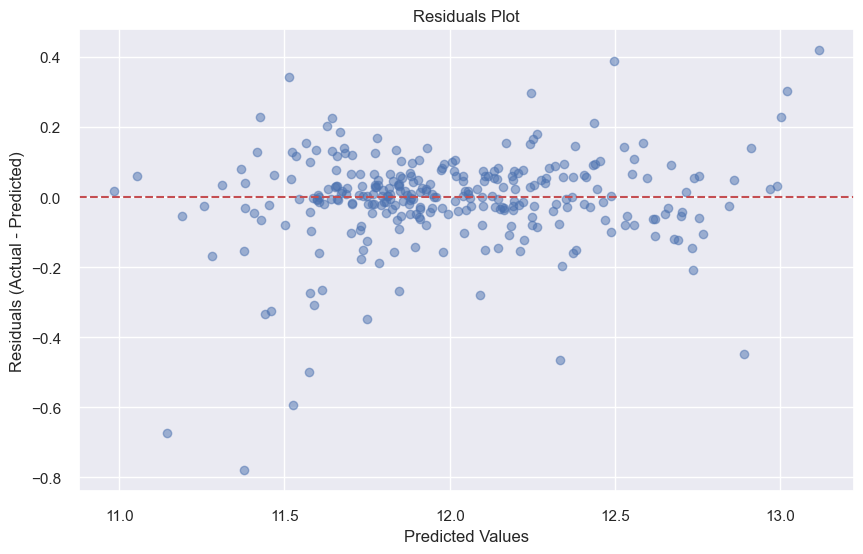

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot of predicted values and residuals
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Print MSE and RMSE
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

In [43]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

class StackingEnsemble:
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model
        self.stacking_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model)

    def fit(self, X_train, y_train):
        self.stacking_reg.fit(X_train, y_train)

    def predict(self, X_test):
        return self.stacking_reg.predict(X_test)

# Example usage:
# Assume you have X_train, X_test, y_train, y_test

# Define base models for regression
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor()),
    ('xgb', XGBRegressor()),
    ('rg',Ridge()) 
]

# Define meta-model for regression
meta_model = LinearRegression()

# Create StackingEnsemble for regression
stacking_ensemble = StackingEnsemble(base_models, meta_model)

# Train the ensemble
stacking_ensemble.fit(X_train, y_train)

# Make predictions
y_pred = stacking_ensemble.predict(X_test)

# Evaluate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Stacking Regressor Mean Squared Error: {mse:.2f}')


Stacking Regressor Mean Squared Error: 0.02


# Anther Way !!

In [44]:
pycaret_setup = setup(data=pd.concat([X_train, y_train], axis=1), target='SalePrice',session_id=1183)

In [45]:
compare_models(['catboost','br','omp','ridge','gbr'])

# EACH MODEL FIRST TRY SUBMISSION

In [46]:
catboost,br,omp,ridge,gbr=create_model('catboost',verbose=False),create_model('br',verbose=False),
create_model('omp',verbose=False),create_model('ridge',verbose=False),create_model('gbr',verbose=False)

ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
catboost.fit(X_train,y_train,verbose=False)
catboost_prediction=np.exp(catboost.predict(X_test))
catboost_submission = pd.concat([test_df['Id'], pd.Series(catboost_prediction, name='SalePrice')], axis=1)
catboost_submission.to_csv('cat_boost_submission_try1.csv', index=False, header=True)


In [ ]:
br.fit(X_train,y_train)
br_prediction=np.exp(br.predict(X_test))
br_submission = pd.concat([test_df['Id'], pd.Series(br_prediction, name='SalePrice')], axis=1)
br_submission.to_csv('br_try1.csv', index=False, header=True)


In [ ]:
omp.fit(X_train,y_train)
omp_prediction=np.exp(omp.predict(X_test))
omp_submission = pd.concat([test_df['Id'], pd.Series(omp_prediction, name='SalePrice')], axis=1)
omp_submission.to_csv('omp_try1.csv', index=False, header=True)


In [ ]:
ridge.fit(X_train,y_train)
ridge_prediction=np.exp(ridge.predict(X_test))
ridge_submission = pd.concat([test_df['Id'], pd.Series(ridge_prediction, name='SalePrice')], axis=1)
ridge_submission.to_csv('ridge_try1.csv', index=False, header=True)


In [ ]:
gbr.fit(X_train,y_train)
gbr_prediction=np.exp(gbr.predict(X_test))
gbr_submission = pd.concat([test_df['Id'], pd.Series(gbr_prediction, name='SalePrice')], axis=1)
gbr_submission.to_csv('gbr_try1.csv', index=False, header=True)


# Creating model ensamble

In [ ]:

models = {
    "br": br,
    "catboost": catboost,
    "omp": omp,
    'GBR':gbr,
    "ridge": ridge
    
}
predictions = (
    0.4 * np.exp(models['br'].predict(X_test)) +
    0.4 * np.exp(models['catboost'].predict(X_test)) +
    0.1 * np.exp(models['omp'].predict(X_test)) +
     0.05 * np.exp(models['GBR'].predict(X_test)) +
    0.05 * np.exp(models['ridge'].predict(X_test))
   
)
ensemble_submission = pd.concat([test_df['Id'], pd.Series(predictions, name='SalePrice')], axis=1)
ensemble_submission.to_csv('submission.csv', index=False, header=True)

